# Melhores Músicas do Spotify de 1999-2019

## 1. Sobre

Esse dataset engloba estatísticas de músicas referentes às 2.000 faixas mais populares no Spotify durante o período de 2000 a 2019. Com cerca de 18 colunas, cada uma detalhando informações sobre a respectiva faixa e suas características.

Usamos o dataset obtido do Kaggle: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

## 1.1 Dicionário de Colunas

artist: Nome do artista.

song: Nome da faixa.

duration_ms: Duração da faixa em milissegundos.

explicit: As letras ou conteúdo de uma música ou vídeo musical contêm um ou mais critérios que podem ser considerados ofensivos ou inadequados para crianças.

year: Ano de lançamento da faixa.

popularity: Quanto maior o valor, mais popular é a música.

danceability: A dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade rítmica, força do ritmo e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

energy: A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade.

key: A tonalidade da faixa. Números inteiros mapeiam para tons usando a notação padrão de Classe de Altura. Por exemplo, 0 = Dó, 1 = Dó sustenido/Ré bemol, 2 = Ré, e assim por diante. Se nenhuma tonalidade for detectada, o valor é -1.

loundness: O volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. O volume é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores geralmente variam entre -60 e 0 dB.

mode: O modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala de onde seu conteúdo melódico é derivado. Maior é representado por 1 e menor por 0.

speechiness: A articulação detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente parecida com fala a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 é o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter tanto música quanto fala, seja em seções ou sobrepostas, incluindo casos como rap. Valores abaixo de 0,33 provavelmente representam faixas musicais e outras não semelhantes a fala.

acousticness: Uma medida de confiança de 0,0 a 1,0 de se a faixa é acústica. 1,0 representa alta confiança de que a faixa é acústica.

instrumentalness: Prevê se uma faixa não contém vocais. Sons como "ooh" e "aah" são tratados como instrumentais nesse contexto. Faixas de rap ou de palavras faladas são claramente "vocais". Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 são destinados a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

liveness: Detecta a presença de uma plateia na gravação. Valores de vivacidade mais altos representam uma probabilidade aumentada de que a faixa foi executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa seja ao vivo.

valence: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, felizes, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, irritadas).

tempo: O andamento estimado geral de uma faixa em batidas por minuto (BPM). Em terminologia musical, andamento é a velocidade ou ritmo de uma peça dada e deriva diretamente da duração média do batimento.

genre: Gênero da faixa.

## 2. Código da Análise

### 2.1 Importando os dados e lendo o arquivo

In [108]:
# Importando as Bibliotecas Necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Lendo o arquivo
df = pd.read_csv("songs_normalize.csv")

### 2.2 Análise Exploratória dos Dados

In [4]:
# Formato do dataset
df.shape

(2000, 18)

In [ ]:
# Visualizando a nossa base
display(df)

In [6]:
# Verificando os valores nulos e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
# Checando os valores nulos
df.isnull().sum()

artist              0
song                0
duration_min        0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [ ]:
# Checando os valores duplicados
df.duplicated().value_counts()

False    1941
True       59
Name: count, dtype: int64

In [14]:
# Vizualizando alguns valores duplicados
df[df.duplicated()].head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Craig David,Fill Me In,257200,False,2000,60,0.682,0.744,8,-6.981,1,0.0365,0.37600,0.009510,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,Destiny's Child,"Independent Women, Pt. 1",221133,False,2001,65,0.730,0.602,6,-3.782,0,0.2060,0.36200,0.000004,0.1690,0.927,97.954,"pop, R&B"
187,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.31500,0.000009,0.0900,0.631,144.673,"pop, R&B"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,"rock, metal"
236,Kylie Minogue,Spinning Around,207866,False,2000,55,0.761,0.662,6,-7.645,0,0.0548,0.29200,0.000062,0.0956,0.631,120.043,"pop, Dance/Electronic"


In [15]:
# Vizualizando um música que está duplicada
df[df['song'] == "In the End"]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
20,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.87,0,0.0584,0.00958,0.0,0.209,0.4,105.143,"rock, metal"
215,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.87,0,0.0584,0.00958,0.0,0.209,0.4,105.143,"rock, metal"


In [26]:
# Removendo as duplicatas
df.drop_duplicates(inplace=True)

In [17]:
# Vizualizando a remoção da música duplicada
df[df['song'] == "In the End"]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
20,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.87,0,0.0584,0.00958,0.0,0.209,0.4,105.143,"rock, metal"


In [ ]:
# Analisando algumas informações estatísticas
df.describe()

,duration_min,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,3.809916,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,0.654163,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,1.883333,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,3.391767,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,3.719767,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,4.132433,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,8.069100,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [27]:
# Renomear coluna "duration_ms" para "duration_min" e converter os valores de milisegundos para minutos
df.rename(columns={'duration_ms': 'duration_min'}, inplace=True)

df['duration_min'] = df['duration_min'] / 60000 # 1 minuto é igual a 60000 milisegundos

df[['duration_min']]

,duration_min
0,3.519333
1,2.784433
2,4.175767
3,3.741550
4,3.342667
...,...
1995,3.017100
1996,2.973767
1997,3.343217
1998,2.850483


### 2.3 Análise do Dataset

#### <center>Qual a correlação das colunas?<center>

C:\Users\jades\AppData\Local\Temp\ipykernel_19328\2385705507.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = df.corr()


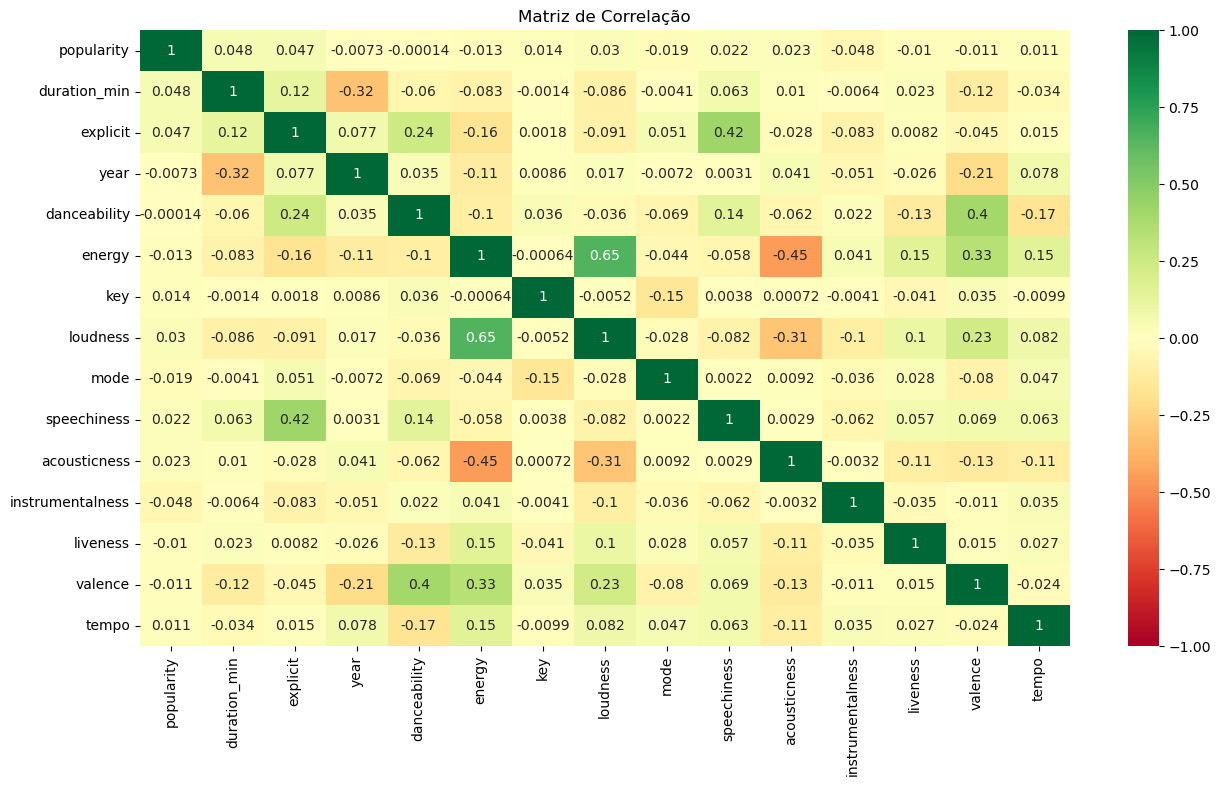

In [122]:
# Geração do gráfico "Matriz de Correlação"

colunas = ['popularity'] + [coluna for coluna in df.columns if coluna != 'popularity']
df = df[colunas]

# Calcule a matriz de correlação
matriz_correlacao = df.corr()

# Crie um mapa de calor com o Seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

# Adicione título
plt.title('Matriz de Correlação')

# Exiba o gráfico
plt.show()

#### <center>Ano de lançamento Inicial vs Final<center>

In [28]:
# Descobrindo o período da análise inicial
ano_inicial = df['year'].min()
print(f'Ano de lançamento inicial: {ano_inicial}')

# Descobrindo o período da análise final
ano_final = df['year'].max()
print(f'Ano de lançamento final: {ano_final}')

Ano de lançamento inicial: 1998
Ano de lançamento final: 2020


#### <center>Qual a quantidade músicas por ano de lançamento?<center>

In [38]:
# Ano a ano das músicas
contagem_por_ano = df['year'].value_counts(ascending=True).sort_index()
contagem_por_ano

1998      1
1999     38
2000     71
2001    106
2002     86
2003     91
2004     95
2005    101
2006     93
2007     90
2008     91
2009     82
2010    103
2011     96
2012    113
2013     87
2014    100
2015     93
2016     98
2017    110
2018    104
2019     89
2020      3
Name: year, dtype: int64

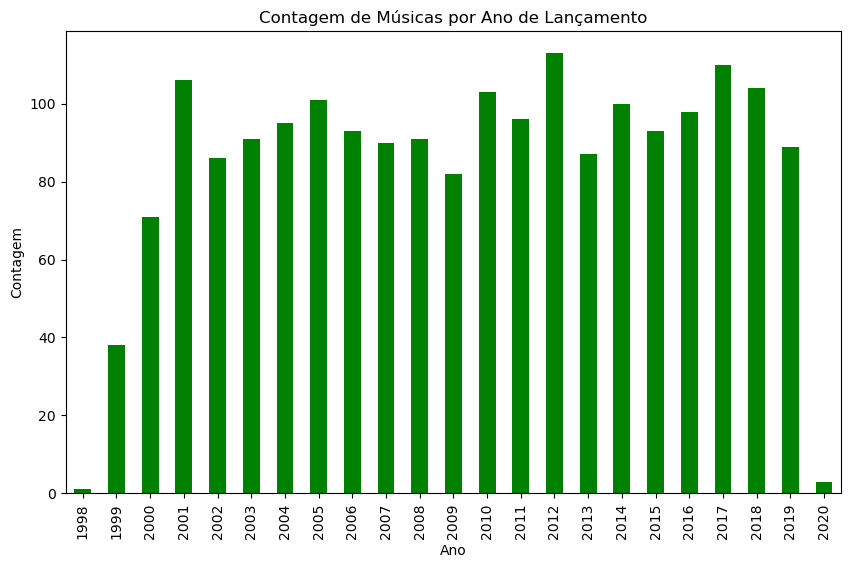

In [75]:
# Geração do gráfico "Contagem de Músicas por Ano de Lançamento"
contagem_por_ano.plot(kind='bar', color='green', figsize=(10, 6))

plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Contagem de Músicas por Ano de Lançamento')

plt.show()


In [172]:
# Total de músicas anteriores a 2009
anos_ant = df.query('year < 2009').shape[0]
anos_ant

863

In [173]:
# Total de músicas posteriores a 2009
anos_atu = df.query('year > 2009').shape[0]
anos_atu

996

A distribuição de músicas por ano de lançamento revela uma concentração significativa de músicas mais recentes, especialmente a partir de 2010, indicando preferências por músicas mais atuais.

In [174]:
# Média de popularidade dos anos de lançamento
df_anos_pop = df.pivot_table(index='year', values='popularity', aggfunc='mean').sort_values(by='popularity', ascending=False)
df_anos_pop

,popularity
year,
2018,70.519231
1999,64.921053
2008,63.208791
2019,63.011236
2002,62.104651
2009,62.024390
2005,61.663366
2010,60.524272
2012,60.203540


In [175]:
# Média dos anos anteriores a 2010
anos_antigos = df.query('year < 2010')['popularity'].mean()
anos_antigos

60.24867724867725

In [176]:
# Média dos anos posteriores a 2010
anos_atuais = df.query('year >= 2010')['popularity'].mean()
anos_atuais

59.049196787148595

Considerando que 2010 está aproximadamente no meio do intervalo de anos (1998 a 2020), pode-se afirmar que as músicas lançadas antes de 2010 são consideradas antigas e os anos posteriores mais atuais. Com isso, observa-se que as músicas mais antigas tendem a ter maior popularidade, conforme a média de popularidade dos anos.

### <Center>Qual o gênero musical que mais aparece no Dataset?<Center>

In [77]:
# Gêneros Musicais que mais apareceram no dataset
top_generos_contagem = df['genre'].value_counts().head(20)
top_generos_contagem

pop                               416
hip hop, pop                      267
hip hop, pop, R&B                 236
pop, Dance/Electronic             216
pop, R&B                          172
hip hop                           121
hip hop, pop, Dance/Electronic     75
rock                               57
Dance/Electronic                   41
rock, pop                          39
rock, metal                        36
pop, latin                         28
pop, rock                          26
set()                              22
latin                              15
hip hop, Dance/Electronic          15
pop, rock, metal                   14
hip hop, pop, latin                14
R&B                                13
pop, rock, Dance/Electronic        12
Name: genre, dtype: int64

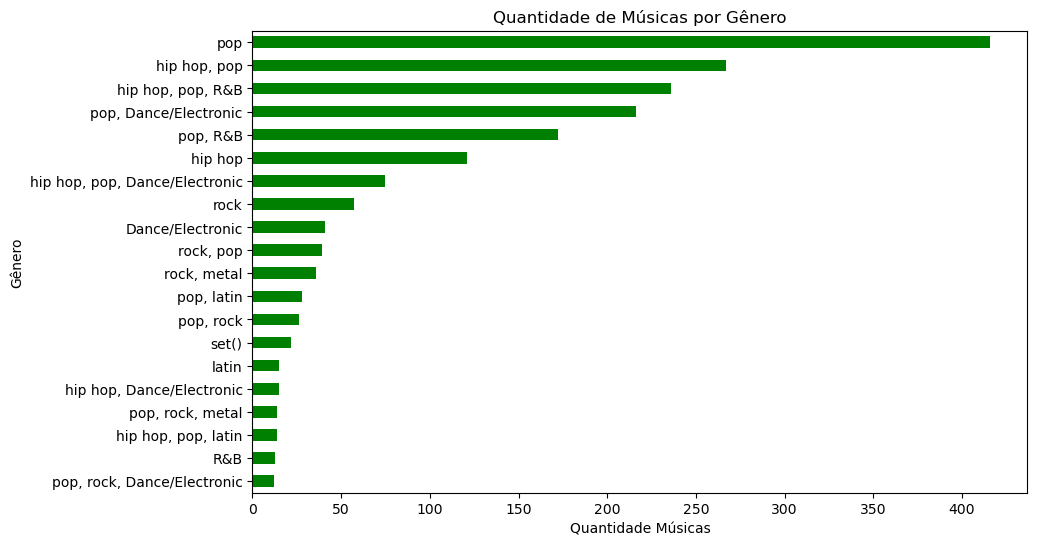

In [79]:
# Geração do gráfico "Quantidade de Músicas por Gênero"
top_generos_contagem.sort_values().plot(kind='barh', color='green', figsize=(10, 6))

plt.xlabel('Quantidade Músicas')
plt.ylabel('Gênero')
plt.title('Quantidade de Músicas por Gênero')

plt.show()

In [128]:
# Verificando a quantidade de vezes que um subgenero aparece no df


df_genres = df['genre'].value_counts().reset_index()
df_genres.columns = ['genre', 'count']

df_subgenres = pd.DataFrame(columns=['subgenre', 'count'])


for index, row in df_genres.iterrows():
    genre = row['genre']
    count = row['count']

    subgenres = [subgenre.strip() for subgenre in genre.split(',')]

    df_subgenres = pd.concat([df_subgenres, pd.DataFrame({'subgenre': subgenres, 'count': count})])

df_subgenres_total = df_subgenres.groupby('subgenre')['count'].sum().reset_index()


df_subgenres_total = df_subgenres_total.sort_values(by='count', ascending=False)


print(df_subgenres_total)

             subgenre count
12                pop  1582
8             hip hop   751
2                 R&B   437
0    Dance/Electronic   380
13               rock   225
11              metal    64
10              latin    63
14              set()    22
1       Folk/Acoustic    20
6             country    20
3   World/Traditional    10
7      easy listening     7
4               blues     4
9                jazz     2
5           classical     1


In [132]:
#Verificando a quantidade de vezes que o termo de um genero aparece na lista de generos

df_genres = pd.DataFrame({'genre': df['genre'].unique()})


def contaSubgenero(genre_string):

    subgeneros = [subgenre.strip() for subgenre in genre_string.split(',')]
    return subgeneros


df_genres['subgenres'] = df_genres['genre'].apply(contaSubgenero)


df_subgenres = pd.DataFrame(columns=['subgenre', 'count'])


for _, row in df_genres.iterrows():
    subgenres = row['subgenres']


    df_subgenres = pd.concat([df_subgenres, pd.DataFrame({'subgenre': subgenres})])


subgenre_counts = df_subgenres['subgenre'].value_counts().reset_index()
subgenre_counts.columns = ['subgenre', 'count']


print(subgenre_counts)

             subgenre  count
0                 pop     34
1                rock     24
2             hip hop     15
3    Dance/Electronic     12
4       Folk/Acoustic     10
5                 R&B      9
6               latin      7
7      easy listening      6
8   World/Traditional      6
9             country      5
10              metal      5
11              blues      2
12              set()      1
13               jazz      1
14          classical      1


#### <center>Qual o gênero musical que mais figura por popularidade?<center>

In [55]:
# Gêneros musicais por popularidade
top_generos_popularidade = df.groupby('genre').sum().sort_values(by='popularity', ascending=False)['popularity'].head(20)
top_generos_popularidade

C:\Users\jades\AppData\Local\Temp\ipykernel_19328\756315076.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_generos_popularidade = df.groupby('genre').sum().sort_values(by='popularity', ascending=False)['popularity'].head(20)


genre
pop                               24580
hip hop, pop                      17100
hip hop, pop, R&B                 13926
pop, Dance/Electronic             11448
pop, R&B                           9900
hip hop                            7757
hip hop, pop, Dance/Electronic     4466
rock                               3805
rock, pop                          2574
rock, metal                        2539
Dance/Electronic                   2122
pop, latin                         1613
pop, rock                          1500
set()                              1264
latin                               936
hip hop, pop, latin                 893
hip hop, Dance/Electronic           889
pop, rock, metal                    826
R&B                                 786
metal                               648
Name: popularity, dtype: int64

Text(0.5, 1.0, 'Populariade vs Gênero')

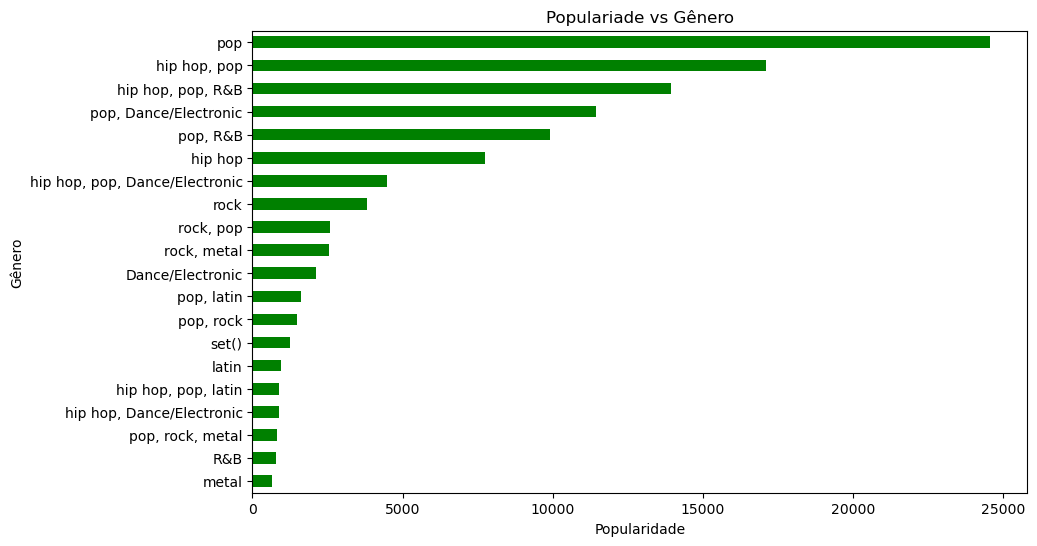

In [57]:
# Geração do gráfico "Quantidade de Músicas por Gênero"
top_generos_popularidade.sort_values().plot(kind='barh', color='green', figsize=(10, 6))

plt.xlabel('Popularidade')
plt.ylabel('Gênero')
plt.title('Populariade vs Gênero')

In [73]:
# Top 10 músicas que mais aparecem no dataset
df[['song','artist', 'genre']].value_counts().head(16)

song                                    artist              genre                
The Heart Wants What It Wants           Selena Gomez        pop                      2
Jumpman                                 Drake               hip hop, pop, R&B        2
Style                                   Taylor Swift        pop                      2
You Don't Own Me (feat. G-Eazy)         SAYGRACE            pop, R&B                 2
Team                                    Lorde               pop, Dance/Electronic    2
Like Toy Soldiers                       Eminem              hip hop                  2
Here                                    Alessia Cara        pop, R&B                 2
Bodak Yellow                            Cardi B             hip hop, pop             2
Stole the Show                          Kygo                pop, Dance/Electronic    2
No Hands (feat. Roscoe Dash & Wale)     Waka Flocka Flame   hip hop, pop             2
Gotta Get Thru This - D'N'D Radio Edit  Daniel B

Temos 15 músicas figurando com dois registros no nosso dataset, `value.counts()` = 2. Esse comportamento se deve ao fato de que essas músicas foram coletadas em playlists diferentes do Spotify, somado a isso, temos o fato de que uma mesma música pode ter sido gravade de maneiras diferentes, excemplo: estúdio e ao vivo.

### <center>Quais artistas possuem mais músicas no dataset?<center>

In [60]:
# Top 10 Artistas que mais apareceram no Dataset
top_artistas_contagem = df[['artist','genre']].value_counts().head(20)
top_artistas_contagem

artist             genre                         
Rihanna            hip hop, pop, R&B                 23
Drake              hip hop, pop, R&B                 23
Eminem             hip hop                           21
Calvin Harris      hip hop, pop, Dance/Electronic    20
Britney Spears     pop                               19
David Guetta       hip hop, pop, Dance/Electronic    18
Beyoncé            pop, R&B                          16
Kanye West         hip hop                           16
Taylor Swift       pop                               16
Chris Brown        hip hop, pop, R&B                 16
Katy Perry         pop                               16
P!nk               pop                               14
Black Eyed Peas    hip hop, pop                      14
Ariana Grande      pop                               13
Maroon 5           pop                               13
JAY-Z              hip hop                           12
Usher              hip hop, pop, R&B                 1

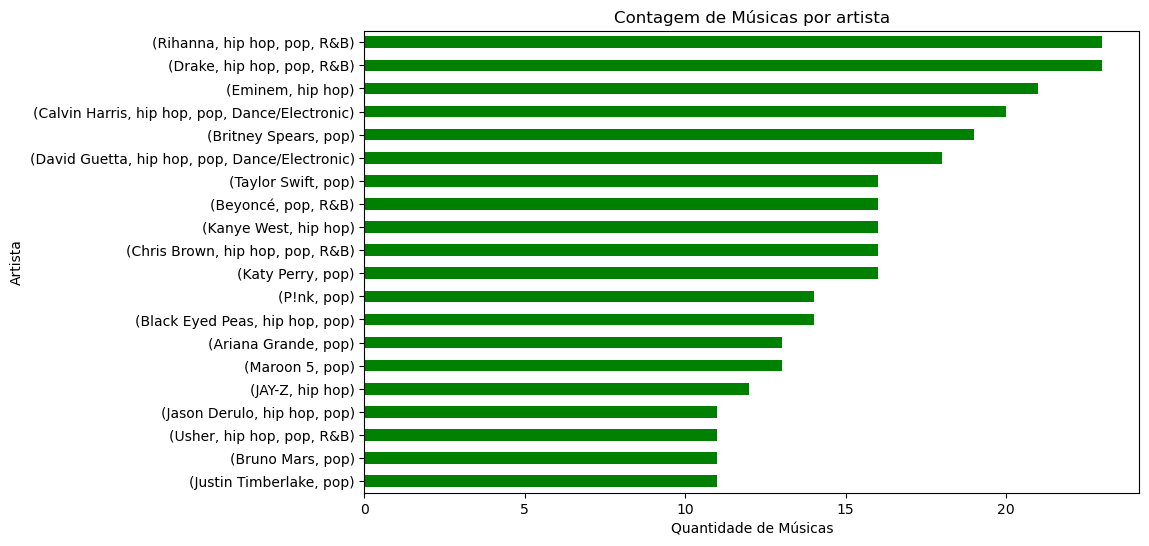

In [110]:
# Geração do gráfico "Contagem de Músicas por artista"
import matplotlib.pyplot as plt

top_artistas_contagem.sort_values().plot(kind='barh', color='green', figsize=(10, 6))

plt.xlabel('Quantidade de Músicas')
plt.ylabel('Artista')
plt.title('Contagem de Músicas por artista')

plt.show()


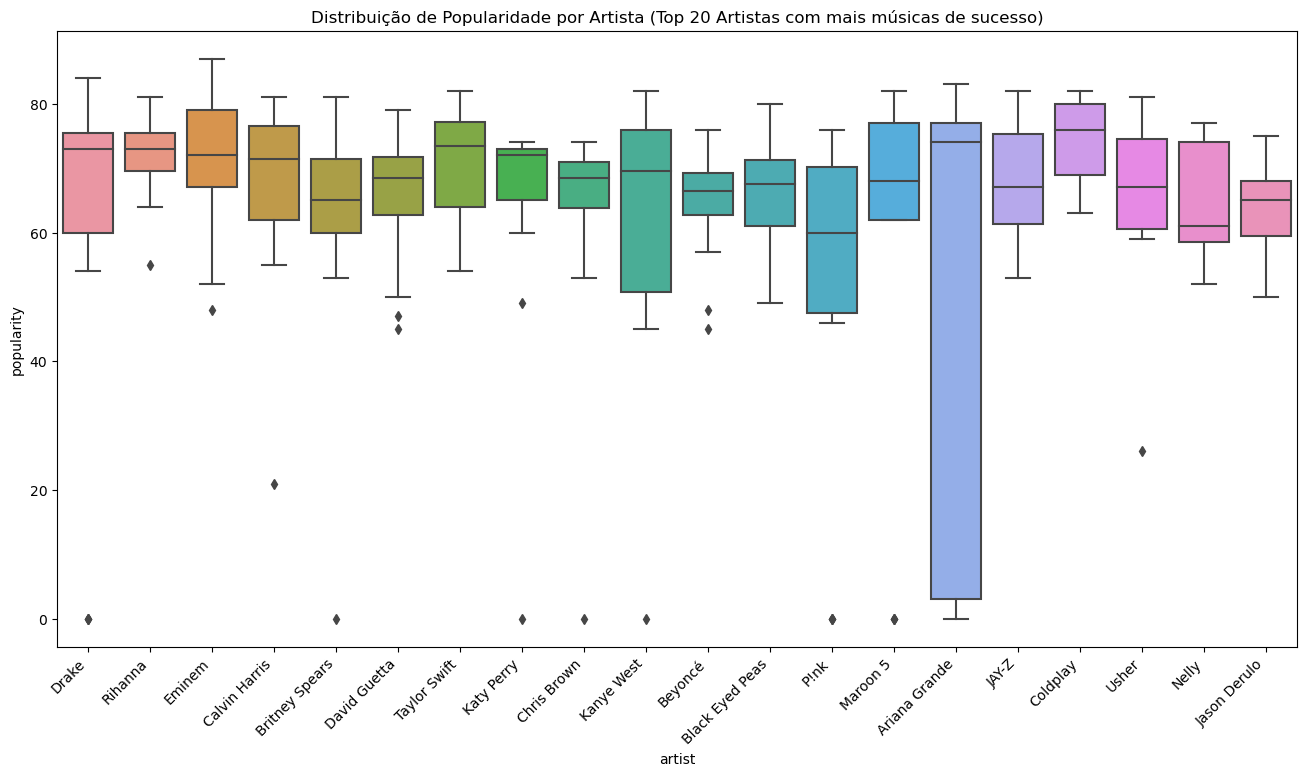

In [127]:
# Encontrar os 20 artistas mais populares pela quantidade de músicas
top_artists = df['artist'].value_counts().head(20).index

# Filtrar o DataFrame para incluir apenas os 20 artistas mais populares
df_top_artists = df[df['artist'].isin(top_artists)]

# Ordenar os artistas pela quantidade de músicas
artist_order = df_top_artists['artist'].value_counts().index

# Boxplot de popularidade por artista
plt.figure(figsize=(16, 8))
sns.boxplot(x='artist', y='popularity', data=df_top_artists, order=artist_order)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição de Popularidade por Artista (Top 20 Artistas com mais músicas de sucesso)')
plt.show()

#### <center>Qual o artista com maior popularidade?<center>

In [70]:
# Top 10 Artistas rankeados por popularidade
top_artistas_popularidade = df.groupby('artist').sum().sort_values(by='popularity', ascending=False)['popularity'].head(20)
top_artistas_popularidade

C:\Users\jades\AppData\Local\Temp\ipykernel_19328\155890879.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_artistas_popularidade = df.groupby('artist').sum().sort_values(by='popularity', ascending=False)['popularity'].head(20)


artist
Rihanna              1662
Eminem               1519
Drake                1424
Calvin Harris        1356
Britney Spears       1198
David Guetta         1185
Taylor Swift         1125
Katy Perry           1033
Beyoncé              1030
Chris Brown          1012
Kanye West            983
Black Eyed Peas       917
Bruno Mars            853
Coldplay              818
JAY-Z                 813
Justin Timberlake     775
Lady Gaga             729
Maroon 5              725
Usher                 719
Nelly                 716
Name: popularity, dtype: int64

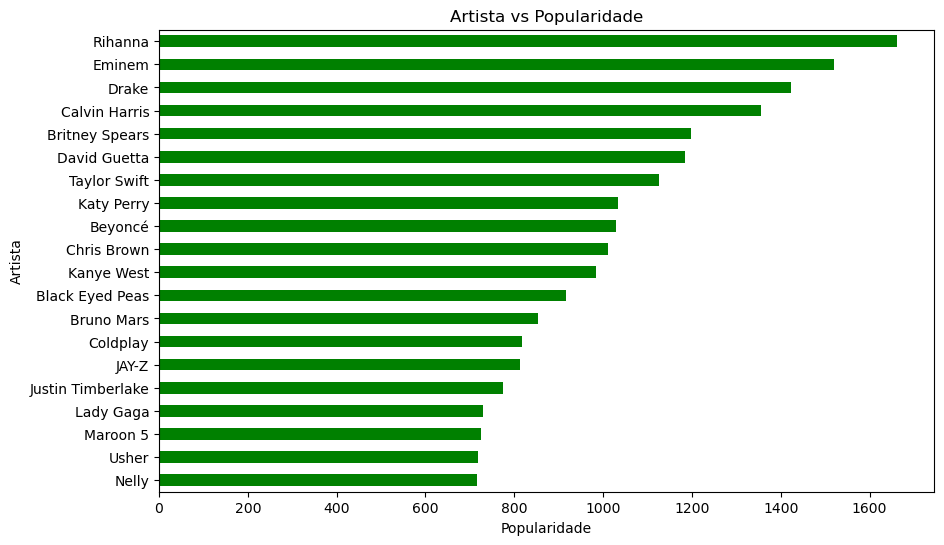

In [72]:
# Geração do gráfico "Contagem de Músicas por Ano de Lançamento"

top_artistas_popularidade.sort_values().plot(kind='barh', color='green', figsize=(10, 6))

plt.xlabel('Popularidade')
plt.ylabel('Artista')
plt.title('Artista vs Popularidade')

plt.show()

#### <center>Qual a música mais popular de todo o Dataset?<center>

In [109]:
# Músicas mais populares
musicas_populares = df.sort_values(by='popularity', ascending=False)[['artist', 'song', 'genre', 'popularity']].head(20)
musicas_populares

,artist,song,genre,popularity
1322,The Neighbourhood,Sweater Weather,"rock, pop",89
1311,Tom Odell,Another Love,pop,88
201,Eminem,Without Me,hip hop,87
1819,Billie Eilish,lovely (with Khalid),"pop, Dance/Electronic",86
1613,WILLOW,Wait a Minute!,"pop, R&B, Dance/Electronic",86
6,Eminem,The Real Slim Shady,hip hop,86
1514,Avicii,The Nights,"pop, Dance/Electronic",85
1512,The Neighbourhood,Daddy Issues,"rock, pop",85
1709,Ed Sheeran,Perfect,pop,85
1999,Post Malone,Circles,hip hop,85


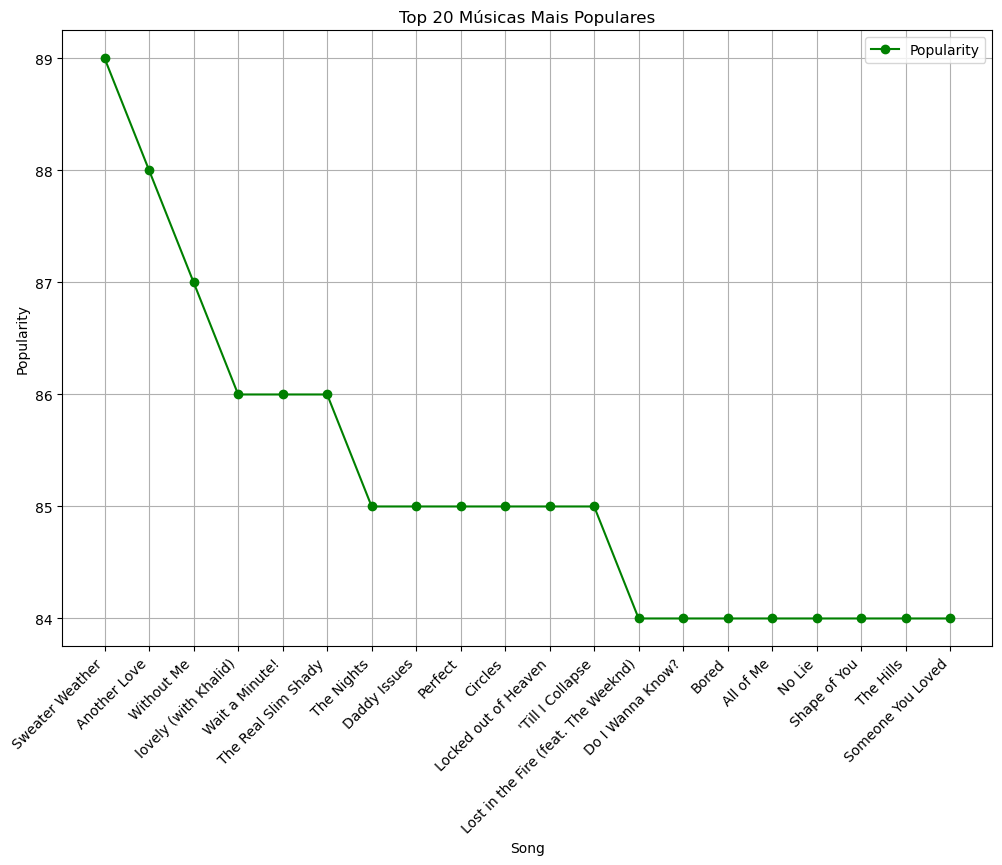

In [111]:
# Geração do gráfico "Top 20 Músicas Mais Populares"
# Criando o gráfico 
plt.figure(figsize=(12, 8))
plt.plot(musicas_populares['song'], musicas_populares['popularity'], marker='o', linestyle='-', color='green')

# Rótulos, títulos e grade
plt.xlabel('Song')
plt.ylabel('Popularity')
plt.title('Top 20 Músicas Mais Populares')
plt.grid(True)

# Rotacionando os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Barra de lengenda
plt.legend(['Popularity'], loc='upper right')

# Exibição do gráfico
plt.show()



### <center>Qual a influência da duração da música na popularidade?<center>

In [115]:
# Influência da duração da música em relação a popularidade
df.sort_values(by='duration_min', ascending=False)[['artist', 'song', 'duration_min', 'popularity']].tail(20)

,artist,song,duration_min,popularity
717,Fedde Le Grand,Put Your Hands Up For Detroit - Radio Edit,2.508883,0
1358,Storm Queen,Look Right Through - MK Vocal Edit,2.506667,0
1933,Post Malone,Wow.,2.492433,79
815,Basshunter,Now You're Gone - Video Edit,2.469767,63
1773,Zay Hilfigerrr,Juju on That Beat (TZ Anthem),2.404067,57
1856,Lil Baby,Yes Indeed,2.371217,79
1526,Lost Frequencies,Are You With Me - Radio Edit,2.314033,33
1987,iann dior,gone girl,2.276133,69
1809,XXXTENTACION,Moonlight,2.251500,82
1927,Lil Tecca,Ransom,2.187333,78


### <center>Qual a média de duração da música por ano de lançamento?<center>

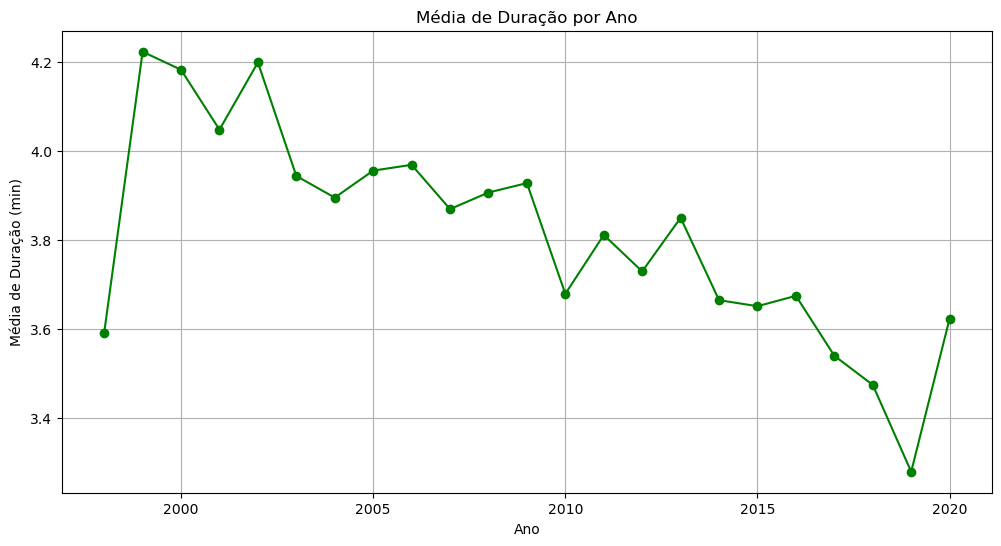

In [ ]:
# Geração do gráfico "Média de Duração por Ano"

# Agrupar por ano e calcular a média da duração
avg_duration_by_year = df.groupby('year')['duration_min'].mean()

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
avg_duration_by_year.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Média de Duração por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Duração (min)')
plt.grid(True)
plt.show()


#### <center>Qual o Percentual do tipo de escala musical?<center>

A tonalidade maior (1) diz respeito a músicas com um contexto mais alegre, já a escala menor nos remete a músicas mais tristes e instrospectivas

In [138]:
# Percentual do tipo de escala musical
df['mode'].value_counts(normalize=True)

1    0.553323
0    0.446677
Name: mode, dtype: float64

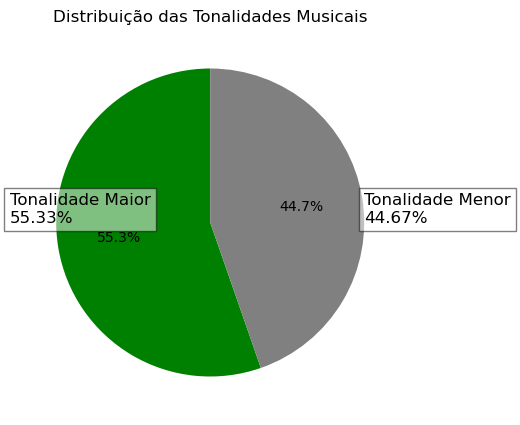

In [159]:
# Percentual do tipo de escala musical
# Calcular o percentual do tipo de escala musical
percentual_escala = df['mode'].value_counts(normalize=True)

# Criar um gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(percentual_escala, labels=None, autopct='%1.1f%%', startangle=90, colors=['green', 'gray'])

# Adicionar anotações
anotacoes = [f'Tonalidade Maior\n{percentual_escala[1]*100:.2f}%',
             f'Tonalidade Menor\n{percentual_escala[0]*100:.2f}%']

plt.text(-1.3, 0, anotacoes[0], fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.0, 0, anotacoes[1], fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Distribuição das Tonalidades Musicais')
plt.show()

#### <center>Qual o Percentual de músicas com conteúdo explícito?<center>

In [139]:
# Percentual de músicas com conteúdo explícito
df['explicit'].value_counts(normalize=True)

False    0.723338
True     0.276662
Name: explicit, dtype: float64

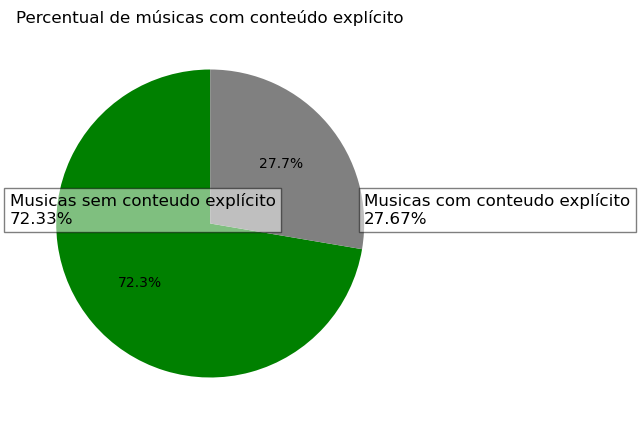

In [164]:
# Percentual de músicas com conteúdo explícito

# Calcular o percentual do tipo de escala musical
percentual_escala = df['explicit'].value_counts(normalize=True)

# Criar um gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(percentual_escala, labels=None, autopct='%1.1f%%', startangle=90, colors=['green', 'gray'])

# Adicionar anotações
anotacoes = [f'Musicas sem conteudo explícito\n{percentual_escala[0]*100:.2f}%',
             f'Musicas com conteudo explícito\n{percentual_escala[1]*100:.2f}%']

plt.text(-1.3, 0, anotacoes[0], fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(1.0, 0, anotacoes[1], fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Percentual de músicas com conteúdo explícito')
plt.show()

#### <center>Qual o número de músicas com conteúdo explícito por ano de lançamento?<center>

In [142]:
# Contéudo Explícito por ano de lançamento
explicitidade_ano = df[df['explicit'] == 1].groupby('year').count()['explicit']
explicitidade_ano

year
1998     1
1999     8
2000    12
2001    23
2002    28
2003    22
2004    35
2005    28
2006    26
2007    22
2008    21
2009    22
2010    23
2011    25
2012    19
2013    19
2014    19
2015    28
2016    31
2017    37
2018    49
2019    37
2020     2
Name: explicit, dtype: int64

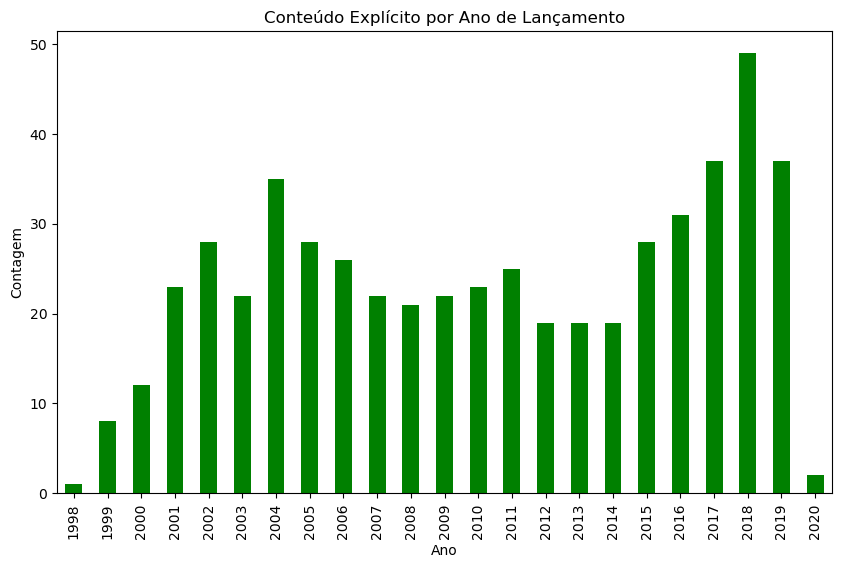

In [144]:
# Geração do gráfico "Conteúdo Explícito por Ano de Lançamento"
explicitidade_ano.plot(kind='bar', color='green', figsize=(10, 6))

plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Conteúdo Explícito por Ano de Lançamento')

plt.show()

#### <center>Histogramas<center>

##### Distribuição da Popularidade

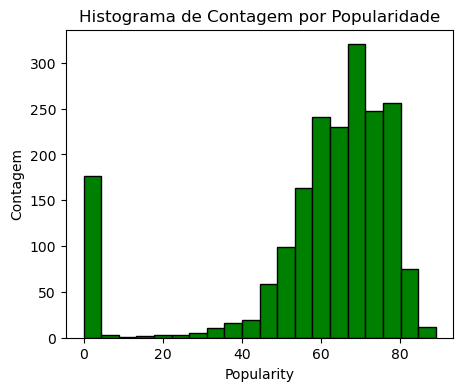

In [171]:
# Criar um histograma de contagem de dados por popularidade
plt.figure(figsize=(5, 4))
plt.hist(df['popularity'], bins=20, color='green', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Popularity')
plt.ylabel('Contagem')
plt.title('Distribuição Popularidade')

# Exibir o gráfico
plt.show()


##### Distribuição da Dançabilidade

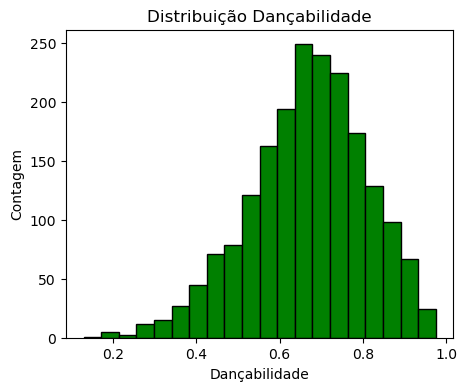

In [181]:
# Criar um histograma de contagem de dados por popularidade
plt.figure(figsize=(5, 4))
plt.hist(df['danceability'], bins=20, color='green', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Dançabilidade')
plt.ylabel('Contagem')
plt.title('Distribuição Dançabilidade')

# Exibir o gráfico
plt.show()

##### Distribuição Vivacidade

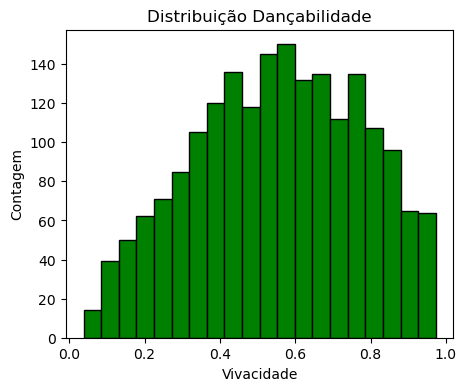

In [182]:
# Criar um histograma de contagem de dados por popularidade
plt.figure(figsize=(5, 4))
plt.hist(df['valence'], bins=20, color='green', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Vivacidade')
plt.ylabel('Contagem')
plt.title('Distribuição Dançabilidade')

# Exibir o gráfico
plt.show()

## 3. Conclusão

Da análise podemos concluir que o gênero mais popular no mercado musical é o pop. Segundo os músicos, a música pop é inerentemente popular porque cria uma sensação de familiaridade nos ouvintes. É importante destacar a fusão do pop com outros ritmos, fazendo com que esses outros gêneros sejam puxados para o topo. Quase 28% das músicas contêm conteúdo explícito, o que para nossa surpresa é um número relativamente baixo comparado com o que nós esperávamos. Os 3 principais cantores que têm mais músicas no dataset são Rihanna, Drake e Eminem. Os 3 principais cantores por popularidade são Rihanna, Eminem e Drake. 

As 3 músicas mais populares para conferir são:

1. [Sweather Weather by The Neighbourhood](https://open.spotify.com/intl-pt/track/5FiHhop5lURiKgpFRHU3QC?si=788174a0b7c041f9)
2. [Another Love by Tom Odell](https://open.spotify.com/intl-pt/track/3B8AjxvLomrKgKwWMCNn31?si=bba112e40d4846d9)
3. [Without Me by Eminem](https://open.spotify.com/intl-pt/track/7lQ8MOhq6IN2w8EYcFNSUk?si=34f521ff780546bb)